In [1]:
import numpy as np
import pandas as pd
import os
import sys

import seaborn as sns

from matplotlib import pyplot as plt

import joblib

In [2]:
columns = []
x_array = ["a","b","c","d","e","f","g"]
for x in x_array:
    for y in range(1, 7):
        columns.append(x+str(y))
columns.append("bias")

----
# 模型的直接解释

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import tree
from sklearn.tree import _tree
from sklearn.base import is_classifier # 用于判断是回归树还是分类树
from dtreeviz.colors import adjust_colors # 用于分类树颜色（色盲友好模式）
import seaborn as sns #用于回归树颜色
from matplotlib.colors import Normalize # 用于标准化RGB数值
import graphviz # 插入graphviz库

In [4]:
model_path = "../Checkpoints/LogisticRegression/"
LR_weights = np.load(os.path.join(model_path,"Weight.npy"))
LR_bias = np.load(os.path.join(model_path,"Bias.npy"))

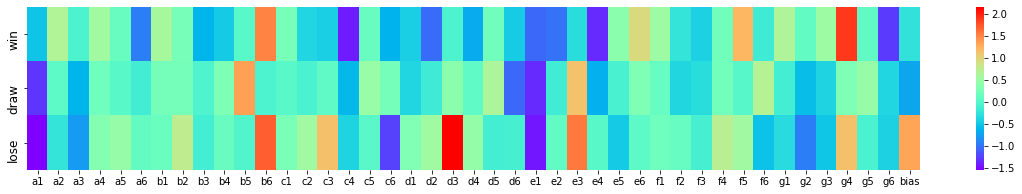

In [5]:
plt.figure(figsize=(20,3))
ax = plt.subplot()
sns.heatmap(np.append(LR_weights,LR_bias.reshape(-1,1),axis=1),cmap=plt.get_cmap("rainbow"))
ax.set_yticklabels(["win","draw","lose"],fontsize=12)
ax.set_xticklabels(columns)
plt.show()

In [133]:
model = joblib.load("../Checkpoints/DecisionTree/tree.pkl")

In [134]:
dot_data = tree.export_graphviz(model, feature_names=columns[:-1],class_names=["lose","draw","win"],
                                filled=True,max_depth=4,proportion=False,rounded=True)

In [135]:
graph = graphviz.Source(dot_data)

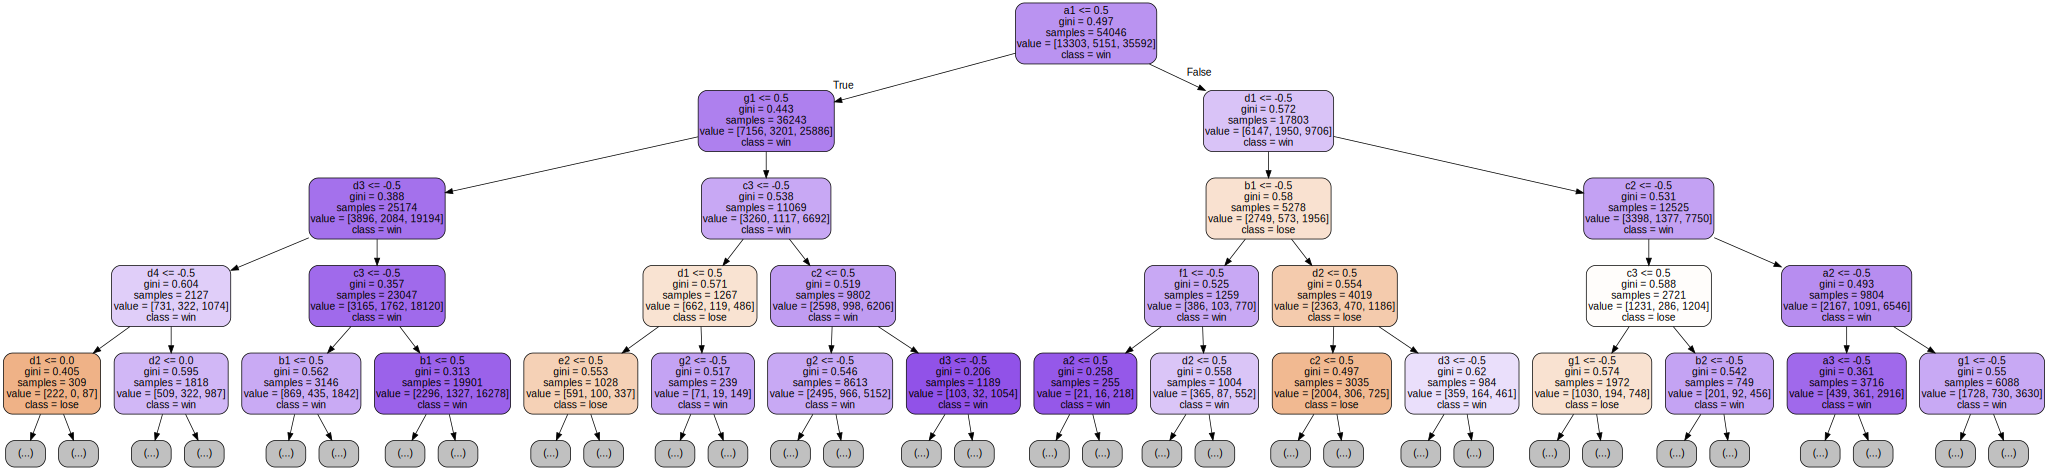

In [136]:
graph

In [137]:
graph.render(directory="../plots/",format="png")

'../plots/Source.gv.png'

----
# SHAP库

In [3]:
import shap
shap.initjs()

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [6]:
X = pd.read_csv("../data/Data_number.csv")

In [ ]:
# 决策树
tree = joblib.load("../Checkpoints/DecisionTree/tree.pkl")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X.drop(columns=["label"]).iloc[:5000,:])  # 传入特征矩阵X，计算SHAP值

In [27]:
# 线性回归
LR = joblib.load("../Checkpoints/LR/10/LR.pkl")
LR_explainer = shap.LinearExplainer(LR,X.drop(columns=["label"]))
LR_shap = LR_explainer.shap_values(X.drop(columns=["label"]).iloc[:5000,:])

In [75]:
idx = 20
print("Tree:",model.predict(X.drop(columns=["label"]).iloc[idx,:].to_numpy().reshape(1,-1)))
print("LR:",LR.predict(X.drop(columns=["label"]).iloc[idx,:].to_numpy().reshape(1,-1)))
label = X.iloc[idx,:].label
print("label:",label)
shap.force_plot(explainer.expected_value[label+1], shap_values[label][idx,:], X.drop(columns=["label"]).iloc[idx,:])

Tree: [1]
LR: [1]
label: 1


In [77]:
shap.force_plot(LR_explainer.expected_value[label+1], LR_shap[label][idx,:], X.drop(columns=["label"]).iloc[idx,:])

In [86]:
idx = 14
print("Tree:",model.predict(X.drop(columns=["label"]).iloc[idx,:].to_numpy().reshape(1,-1)))
print("LR:",LR.predict(X.drop(columns=["label"]).iloc[idx,:].to_numpy().reshape(1,-1)))
label = X.iloc[idx,:].label
print("label:",label)
shap.force_plot(explainer.expected_value[label+1], shap_values[label][idx,:], X.drop(columns=["label"]).iloc[idx,:])


Tree: [-1]
LR: [1]
label: -1


In [87]:
shap.force_plot(LR_explainer.expected_value[label+1], LR_shap[label][idx,:], X.drop(columns=["label"]).iloc[idx,:])

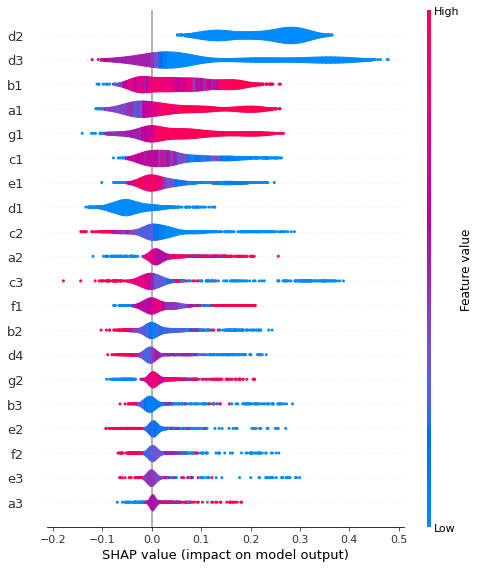

In [125]:
# summarize the effects of all the features, lose
ty = -1
idx = X.iloc[:5000,:].loc[X.label==ty].index.to_numpy()
shap.summary_plot(shap_values[ty+1][idx], X.drop(columns=["label"]).iloc[idx,:],plot_type="violin")

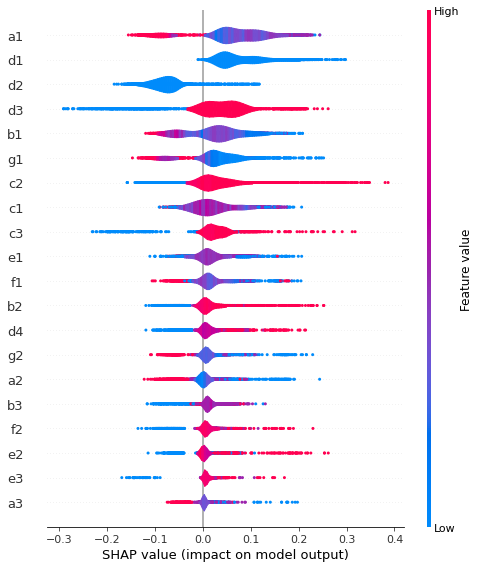

In [127]:
# summarize the effects of all the features, win
ty = 1
idx = X.iloc[:5000,:].loc[X.label==ty].index.to_numpy()
shap.summary_plot(shap_values[ty+1][idx], X.drop(columns=["label"]).iloc[idx,:],plot_type="violin")

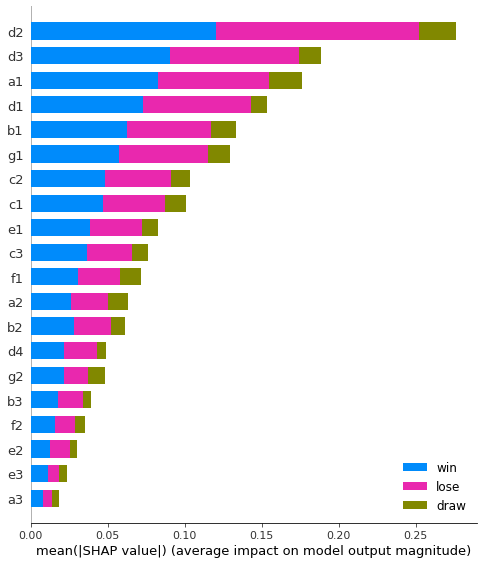

In [131]:
# summarize the effects of all the features, abs
shap.summary_plot(shap_values, X.drop(columns=["label"]).iloc[:5000,:],class_names=["lose","draw","win"])

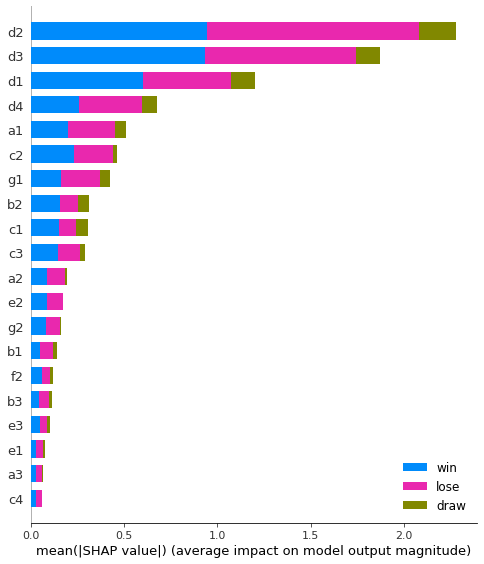

In [132]:
# summarize the effects of all the features
shap.summary_plot(LR_shap, X.drop(columns=["label"]).iloc[:5000,:],class_names=["lose","draw","win"])

------
# 评价指标

In [8]:
LR_best = ["d2","d3","d1","d4","a1","c2","g1","b2","c1","c3"]
CART_best = ["d2","d3","a1","d1","b1","g1","c2","c1","e1","c3"]

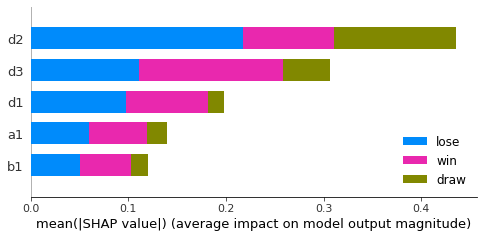

In [9]:
idx = 5
model = joblib.load("../Checkpoints/DecisionTree/5/tree.pkl")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X.drop(columns=["label"]).iloc[:5000,:].loc[:,CART_best[:idx]])  # 传入特征矩阵X，计算SHAP值
shap.summary_plot(shap_values, X.drop(columns=["label"]).iloc[:5000,:].loc[:,CART_best[:idx]],class_names=["lose","draw","win"])

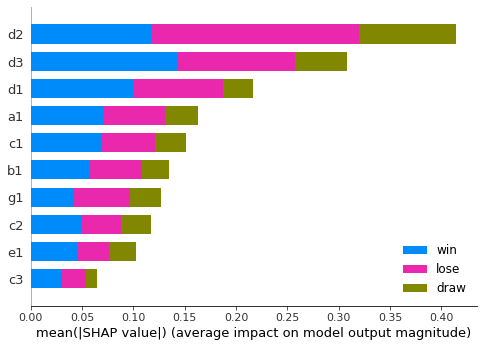

In [187]:
idx =10
model = joblib.load("../Checkpoints/DecisionTree/10/tree.pkl")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X.drop(columns=["label"]).iloc[:5000,:].loc[:,CART_best[:10]])  # 传入特征矩阵X，计算SHAP值
shap.summary_plot(shap_values, X.drop(columns=["label"]).iloc[:5000,:].loc[:,CART_best[:10]],class_names=["lose","draw","win"])

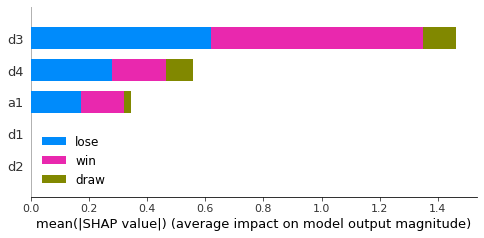

In [194]:
idx = 5
model = joblib.load("../Checkpoints/LR/5/LR.pkl")
explainer = shap.LinearExplainer(model,X.drop(columns=["label"]).iloc[:5000,:].loc[:,LR_best[:idx]])
shap_values = explainer.shap_values(X.drop(columns=["label"]).iloc[:5000,:].loc[:,LR_best[:idx]])  # 传入特征矩阵X，计算SHAP值
shap.summary_plot(shap_values, X.drop(columns=["label"]).iloc[:5000,:].loc[:,LR_best[:idx]],class_names=["lose","draw","win"])

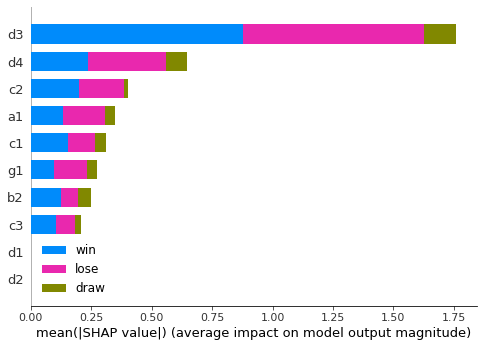

In [197]:
idx = 10
model = joblib.load("../Checkpoints/LR/10/LR.pkl")
explainer = shap.LinearExplainer(model,X.drop(columns=["label"]).iloc[:5000,:].loc[:,LR_best[:idx]])
shap_values = explainer.shap_values(X.drop(columns=["label"]).iloc[:5000,:].loc[:,LR_best[:idx]])  # 传入特征矩阵X，计算SHAP值
shap.summary_plot(shap_values, X.drop(columns=["label"]).iloc[:5000,:].loc[:,LR_best[:idx]],class_names=["lose","draw","win"])